# New Red Bull API

For the Safari Rally Kenya, April 2025, a new API appears to have been introduced.

Now might be a good time to move everything into a database:

- all API calls are used to populate a database;
- all queries are made against the database;
- logic determines whether to upsert items to the database via new API calls.



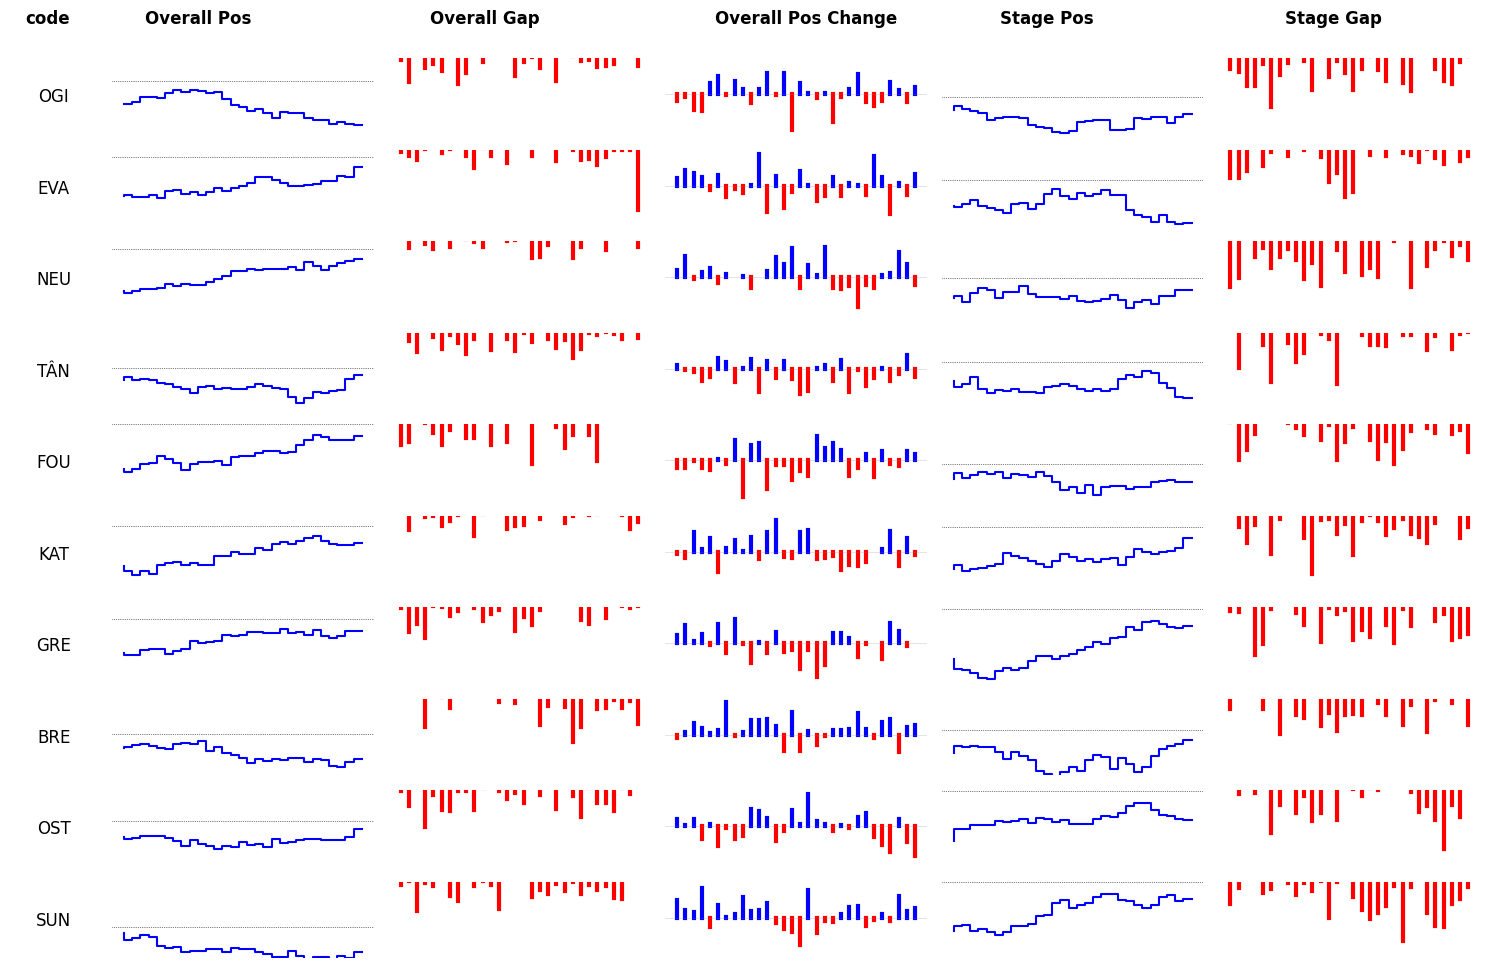

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import NullFormatter

# Sample data creation - replace this with your actual data
np.random.seed(42)

# Define the codes
codes = ["OGI", "EVA", "NEU", "TÂN", "FOU", "KAT", "GRE", "BRE", "OST", "SUN"]

# Create sample data for each metric and code
n_periods = 30
data = []

for code in codes:
    # Generate random time series data with some trends
    overall_pos = np.cumsum(np.random.normal(0, 0.5, n_periods)) + 10
    overall_gap = -np.abs(np.random.normal(0, 1, n_periods)) - 5  # Negative values
    overall_pos_change = np.random.normal(0, 1, n_periods)
    stage_pos = np.cumsum(np.random.normal(0, 0.3, n_periods)) + 5
    stage_gap = -np.abs(np.random.normal(0, 0.8, n_periods)) - 3  # Negative values

    for i in range(n_periods):
        data.append(
            {
                "code": code,
                "period": i,
                "overall_pos": overall_pos[i],
                "overall_gap": overall_gap[i],
                "overall_pos_change": overall_pos_change[i],
                "stage_pos": stage_pos[i],
                "stage_gap": stage_gap[i],
            }
        )

# Convert to DataFrame
df = pd.DataFrame(data)


# TO DO
# need a long data frame; periods col is eg the split sequence number or stage sequence number
# eg by stage with cols: acc pos, acc gap, split pos, split gap
# eg by event with cols: overall pos, overall gap, overall pos change, stage pos, stage gap,
def sparkline_dashboard(df):
    # Now create the sparkline dashboard
    # plt.style.use("ggplot")
    plt.style.use("default")
    fig = plt.figure(figsize=(15, 10), facecolor="white")

    # Define metrics to plot
    metrics = ["overall_pos", "overall_gap", "overall_pos_change", "stage_pos", "stage_gap"]

    # Set up the grid
    n_rows = len(codes)
    n_cols = len(metrics) + 1  # +1 for the code column
    gs = gridspec.GridSpec(n_rows, n_cols, width_ratios=[1] + [3] * len(metrics))

    # Create a title row
    plt.figtext(0.02, 0.95, "code", fontsize=12, fontweight="bold")
    x_pos = 0.1
    x_gap = 0.95/len(metrics)
    for metric in metrics:
        plt.figtext(
            x_pos, 0.95, metric.replace("_", " ").title(), fontsize=12, fontweight="bold"
        )
        x_pos += x_gap

    # Plot each sparkline
    for i, code in enumerate(codes):
        code_data = df[df["code"] == code]

        # Add code name
        ax_code = plt.subplot(gs[i, 0])
        ax_code.text(0.5, 0.5, code, fontsize=12, ha="center", va="center")
        ax_code.axis("off")

        # Create sparklines for each metric
        for j, metric in enumerate(metrics):
            ax = plt.subplot(gs[i, j + 1])

            values = code_data[metric].values
            periods = code_data["period"].values

            # Determine color based on the metric
            if "gap" in metric:
                color = "red"  # Negative values
            else:
                color = "blue"

            # Plot the sparkline
            if "change" not  in metric and "gap" not in metric:
                # Use a step plot
                ax.step(periods, values, color=color, linewidth=1.5)

                # Add dotted horizontal lines for reference
                if values.max() > 0 and values.min() < 0:
                    ax.axhline(y=0, color="black", linestyle=":", linewidth=0.5)

                # Add top and bottom reference lines
                y_max = values.max() * 1.1
                y_min = values.min() * 1.1 if values.min() < 0 else 0
                ax.axhline(y=y_max, color="black", linestyle=":", linewidth=0.5)
                ax.axhline(y=y_min, color="black", linestyle=":", linewidth=0.5)

            # Add bar chart style for some metrics (like changes or gaps)
            if "change" in metric or "gap" in metric:
                for k, v in enumerate(values):
                    if v > 0:
                        ax.plot([k, k], [0, v], color=color, linewidth=3)
                    else:
                        ax.plot([k, k], [0, v], color="red", linewidth=3)

            # Remove axes
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["bottom"].set_visible(False)
            ax.spines["left"].set_visible(False)
            ax.tick_params(axis="both", which="both", length=0)

            # Add light horizontal grid line
            ax.axhline(y=0, color="gray", alpha=0.3, linewidth=0.5)

            # Set y-axis limits to be consistent across rows for the same metric
            metric_min = df[metric].min() * 1.1
            metric_max = df[metric].max() * 1.1
            ax.set_ylim(metric_min, metric_max)

    # Add horizontal lines between rows
    for i in range(1, n_rows):
        plt.axhline(
            y=i / n_rows,
            color="green",
            linestyle="-",
            linewidth=0.5,
            xmin=0.05,
            xmax=0.95,
        )

    plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0.05, right=0.95, top=0.9, bottom=0.05)
    # plt.suptitle("Sparkline Dashboard", fontsize=14, y=0.98)

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    return plt

sparkline_dashboard(df)

plt.show()

In [2]:
%run wrc_rallydj/livetiming_api2.py

## TO DO - update for use with ERC

- rounds load ok
- TO DO - clear, identify and load categories
- TO DO - clear and load days
- TO DO - clear and load sections
- TO DO - clear and load stages
- TO DO - items around _getChampionshipName need clarifying; only for championship results? Not in-rally?


In [3]:
wrc = WRCTimingResultsAPIClientV2(newDB=True)

INFO:__main__:Initialising the database...
INFO:__main__:Creating new db tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/seasons.json


INFO:__main__:Upserting seasons...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/season-detail.json?seasonId=34


INFO:__main__:Upserting championship_lookup...
INFO:__main__:Upserting season_rounds...


In [4]:
wrc.isRallyLive(), wrc.isRallyInDate()

(False, False)

In [5]:
wrc.getSeasons()

,seasonId,name,year
0,1,World Rally Championship,2018
1,4,World Rally Championship,2019
2,6,World Rally Championship,2020
3,8,World Rally Championship,2021
4,11,World Rally Championship,2022
5,12,European Rally Championship,2022
6,20,World Rally Championship,2023
7,21,European Rally Championship,2023
8,28,World Rally Championship,2024
9,29,European Rally Championship,2024


In [6]:
# From the seasons we can search on year and name
# Names: "World Rally Championship", "European Rally Championship"
# Return: seasonId (e.g World Rally Championship 2025: seasonId=34)
#
season_rounds = wrc.getSeasonRounds()
season_rounds

,categories,clerkOfTheCourse,country.countryId,country.iso2,country.iso3,country.name,countryId,eventId,finishDate,location,...,startDate,stewards,surfaces,templateFilename,timeZoneId,timeZoneName,timeZoneOffset,trackingEventId,order,seasonId
0,None,Romain PUGLIESE,147,MC,MCO,Monaco,147,534,2025-01-26,"Gap, France",...,2025-01-23,Tanja GEILHAUSEN Edoardo DELLEANI ...,Mixed,results-report-templates/e352213e-0a5d-443f-b9...,Europe/Monaco,(UTC+01:00) Central European Time (Monaco) (C...,120,4208,1,34
1,None,Stig Rune Kjernsli,215,SE,SWE,Sweden,215,535,2025-02-16,"Umeå, Västerbotten County",...,2025-02-13,Mazen Al-Hilli Mathieu Remmerie ...,Snow,results-report-templates/99d0742c-4b8a-4bc9-ab...,Europe/Stockholm,(UTC+01:00) Central European Time (Stockholm) ...,120,4209,2,34
2,None,George Mwangi,116,KE,KEN,Kenya,116,536,2025-03-23,Nairobi,...,2025-03-20,Tanja Geilhausen Alice Scutellà ...,Gravel,results-report-templates/fde0030f-74a1-48a6-ba...,Africa/Nairobi,(UTC+03:00) East Africa Time (Nairobi),180,4210,3,34
3,None,Manuel VIDAL,209,ES,ESP,Spain,209,538,2025-04-27,"Las Palmas, Canarias",...,2025-04-25,Mazen AL-HILLI Andrew KELLITT Davi...,Tarmac,results-report-templates/5b67986e-216b-4120-91...,Atlantic/Canary,(UTC+00:00) Western European Time (Canary) (C...,60,4211,4,34
4,None,None,178,PT,PRT,Portugal,178,540,2025-05-18,"Matosinhos, Porto",...,2025-05-15,None,Gravel,None,AUS Eastern Standard Time,(UTC+10:00) Eastern Australia Time (Sydney),600,4212,5,34
5,None,None,110,IT,ITA,Italy,110,542,2025-06-08,"Alghero, Sardinia",...,2025-06-05,None,Gravel,None,AUS Eastern Standard Time,(UTC+10:00) Eastern Australia Time (Sydney),600,4213,6,34
6,None,None,86,GR,GRC,Greece,86,544,2025-06-29,"Lamia, Central Greece",...,2025-06-26,None,Gravel,None,AUS Eastern Standard Time,(UTC+10:00) Eastern Australia Time (Sydney),600,4214,7,34
7,None,None,70,EE,EST,Estonia,70,546,2025-07-20,Tartu,...,2025-07-17,None,Gravel,None,AUS Eastern Standard Time,(UTC+10:00) Eastern Australia Time (Sydney),600,4215,8,34
8,None,None,75,FI,FIN,Finland,75,547,2025-08-03,Jyväskylä,...,2025-07-31,None,Gravel,None,AUS Eastern Standard Time,(UTC+10:00) Eastern Australia Time (Sydney),600,4216,9,34
9,None,None,173,PY,PRY,Paraguay,173,549,2025-08-31,Itapúa,...,2025-08-28,None,Gravel,None,AUS Eastern Standard Time,(UTC+10:00) Eastern Australia Time (Sydney),600,4217,10,34


In [7]:
season_rounds.columns

Index(['categories', 'clerkOfTheCourse', 'country.countryId', 'country.iso2',
       'country.iso3', 'country.name', 'countryId', 'eventId', 'finishDate',
       'location', 'mode', 'name', 'organiserUrl', 'slug', 'startDate',
       'stewards', 'surfaces', 'templateFilename', 'timeZoneId',
       'timeZoneName', 'timeZoneOffset', 'trackingEventId', 'order',
       'seasonId'],
      dtype='object')

In [8]:
wrc.getSeasonRounds().columns

Index(['categories', 'clerkOfTheCourse', 'country.countryId', 'country.iso2',
       'country.iso3', 'country.name', 'countryId', 'eventId', 'finishDate',
       'location', 'mode', 'name', 'organiserUrl', 'slug', 'startDate',
       'stewards', 'surfaces', 'templateFilename', 'timeZoneId',
       'timeZoneName', 'timeZoneOffset', 'trackingEventId', 'order',
       'seasonId'],
      dtype='object')

In [9]:
wrc.getSeasonRounds()["name"]

0             Rallye Monte-Carlo
1                   Rally Sweden
2             Safari Rally Kenya
3           Rally Islas Canarias
4     Vodafone Rally de Portugal
5          Rally Italia Sardegna
6     EKO Acropolis Rally Greece
7            Delfi Rally Estonia
8            Secto Rally Finland
9             Rally del Paraguay
10          Rally Chile Bio Bío
11        Central European Rally
12            FORUM8 Rally Japan
13            Rally Saudi Arabia
Name: name, dtype: object

In [10]:
wrc.setEventByName("Rally Sweden")
wrc.eventId, wrc.eventName, wrc.year, wrc.isRallyLive(), wrc.isRallyInDate()

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535.json


INFO:__main__:Upserting event_classes...
INFO:__main__:Upserting event_rallies...
INFO:__main__:Upserting event_date...
INFO:__main__:Upserting stage_info...
INFO:__main__:Upserting split_points...
INFO:__main__:Upserting stage_controls...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages.json


INFO:__main__:Upserting meta_completed_event_tables...
INFO:__main__:Upserting meta_completed_event_tables...
INFO:__main__:Upserting meta_completed_event_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/rallies/583/entries.json


INFO:__main__:Upserting entries...
INFO:__main__:Upserting entries_drivers...
INFO:__main__:Upserting entries_codrivers...
INFO:__main__:Upserting groups...
INFO:__main__:Upserting manufacturers...
INFO:__main__:Upserting entrants...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/itineraries/1137.json


INFO:__main__:Upserting itinerary_legs...
INFO:__main__:Upserting itinerary_stages...
INFO:__main__:Upserting itinerary_sections...
INFO:__main__:Upserting itinerary_controls...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/startLists/1810.json


INFO:__main__:Upserting startlists...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/startLists/1811.json


INFO:__main__:Upserting startlists...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/startLists/1813.json


INFO:__main__:Upserting startlists...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/startLists/1815.json


INFO:__main__:Upserting startlists...


(535, 'Rally Sweden', 2025, False, False)

In [11]:
wrc.getCompletedStages(stageId=8333), wrc.getCompletedStages(stageId=[8331, 8333])

({8330: 'SS1', 8331: 'SS2', 8332: 'SS3', 8333: 'SS4'},
 {8331: 'SS2', 8333: 'SS4'})

In [12]:
wrc.getStageTimes(completed=True, raw=False, updateDB=True)

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8330/stagetimes.json?rallyId=583


INFO:__main__:Upserting stage_times...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8331/stagetimes.json?rallyId=583


INFO:__main__:Upserting stage_times...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8332/stagetimes.json?rallyId=583


INFO:__main__:Upserting stage_times...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8333/stagetimes.json?rallyId=583


INFO:__main__:Upserting stage_times...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8334/stagetimes.json?rallyId=583


INFO:__main__:Upserting stage_times...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8335/stagetimes.json?rallyId=583


INFO:__main__:Upserting stage_times...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8336/stagetimes.json?rallyId=583


INFO:__main__:Upserting stage_times...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8337/stagetimes.json?rallyId=583


INFO:__main__:Upserting stage_times...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8338/stagetimes.json?rallyId=583


INFO:__main__:Upserting stage_times...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8339/stagetimes.json?rallyId=583


INFO:__main__:Upserting stage_times...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8340/stagetimes.json?rallyId=583


INFO:__main__:Upserting stage_times...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8341/stagetimes.json?rallyId=583


INFO:__main__:Upserting stage_times...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8342/stagetimes.json?rallyId=583


INFO:__main__:Upserting stage_times...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8343/stagetimes.json?rallyId=583


INFO:__main__:Upserting stage_times...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8344/stagetimes.json?rallyId=583


INFO:__main__:Upserting stage_times...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8345/stagetimes.json?rallyId=583


INFO:__main__:Upserting stage_times...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8346/stagetimes.json?rallyId=583


INFO:__main__:Upserting stage_times...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8347/stagetimes.json?rallyId=583


INFO:__main__:Upserting stage_times...
INFO:__main__:Upserting meta_completed_stage_tables...


,driverCode,driverName,codriverName,manufacturerName,entrantName,vehicleModel,carNo,priority,eligibility,stageCode,...,roadPos,categoryPosition,Gap,Diff,Chase,timeInS,timeToCarBehind,speed (km/h),pace (s/km),pace diff (s/km)
0,EVA,Elfyn EVANS,Scott MARTIN,Toyota,TOYOTA GAZOO RACING WRT,GR Yaris Rally1,33,P1,M,SS1,...,1,1,0.0,0.0,0.7,201.6,-1.2,153.9,23.39,0.00
1,FOU,Adrien FOURMAUX,Alexandre CORIA,Hyundai,HYUNDAI SHELL MOBIS WORLD RALLY TEAM,i20 N Rally1,16,P1,M,SS1,...,2,69,1.2,0.7,0.5,202.8,0.7,153.0,23.53,0.14
2,ROV,Kalle ROVANPERÄ,Jonne HALTTUNEN,Toyota,TOYOTA GAZOO RACING WRT,GR Yaris Rally1,69,P1,M,SS1,...,3,21,0.5,0.5,0.0,202.1,0.0,153.5,23.45,0.06
3,TÄN,Ott TÄNAK,Martin JÄRVEOJA,Hyundai,HYUNDAI SHELL MOBIS WORLD RALLY TEAM,i20 N Rally1,8,P1,M,SS1,...,4,54,0.5,0.0,2.5,202.1,-3.2,153.5,23.45,0.06
4,NEU,Thierry NEUVILLE,Martijn WYDAEGHE,Hyundai,HYUNDAI SHELL MOBIS WORLD RALLY TEAM,i20 N Rally1,1,P1,M,SS1,...,5,81,3.7,2.5,1.9,205.3,-3.8,151.2,23.82,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,VAS,Georgios VASILAKIS,Allan HARRYMAN,Ford,GEORGIOS VASILAKIS,Fiesta Rally3,51,P3,WRC3 (DM/CM),SS17,...,1069,929,278.8,9.9,1.7,1132.1,764.3,27.4,131.33,107.94
1069,VAS,Georgios VASILAKIS,Allan HARRYMAN,Ford,GEORGIOS VASILAKIS,Fiesta Rally3,51,P3,WRC3 (DM/CM),SS18,...,1070,955,68.9,1.7,320.5,367.8,-1084.2,84.4,42.67,19.28
1070,COV,Carlo COVI,Michela LORIGIOLA,Renault,CARLO COVI,Clio RS Line,74,,,SS16,...,1071,1034,596.7,320.5,140.5,1452.0,-46.9,21.4,168.45,145.06
1071,COV,Carlo COVI,Michela LORIGIOLA,Renault,CARLO COVI,Clio RS Line,74,,,SS17,...,1072,983,645.6,140.5,14.8,1498.9,1095.9,20.7,173.89,150.50


In [13]:
# TO DO  - in stageWinners, add wrc.getStageWinnerAdvantages() info
# TO DO  - creat an eventWinners table, cf. stageWinners
# TO DO - for eventWinners, add getEventWinnerAdvantages(); also show surface, numStageWins
# TO DO - display eventWinners table in Season info section

In [14]:
wrc.getStageOverallResults(completed=True, raw=False, updateDB=True)

DEBUG:__main__:getStageOverallResults: completed: True running: False updateDB:True liveCatchup: False isStageLive: False


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8330/results.json?rallyId=583


INFO:__main__:Upserting stage_overall...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8331/results.json?rallyId=583


INFO:__main__:Upserting stage_overall...
INFO:__main__:Upserting meta_completed_stage_tables...
INFO:__main__:Upserting stage_overall...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8332/results.json?rallyId=583


INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8333/results.json?rallyId=583


INFO:__main__:Upserting stage_overall...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8334/results.json?rallyId=583


INFO:__main__:Upserting stage_overall...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8335/results.json?rallyId=583


INFO:__main__:Upserting stage_overall...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8336/results.json?rallyId=583


INFO:__main__:Upserting stage_overall...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8337/results.json?rallyId=583


INFO:__main__:Upserting stage_overall...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8338/results.json?rallyId=583


INFO:__main__:Upserting stage_overall...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8339/results.json?rallyId=583


INFO:__main__:Upserting stage_overall...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8340/results.json?rallyId=583


INFO:__main__:Upserting stage_overall...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8341/results.json?rallyId=583


INFO:__main__:Upserting stage_overall...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8342/results.json?rallyId=583


INFO:__main__:Upserting stage_overall...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8343/results.json?rallyId=583


INFO:__main__:Upserting stage_overall...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8344/results.json?rallyId=583


INFO:__main__:Upserting stage_overall...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8345/results.json?rallyId=583


INFO:__main__:Upserting stage_overall...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8346/results.json?rallyId=583


INFO:__main__:Upserting stage_overall...
INFO:__main__:Upserting meta_completed_stage_tables...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8347/results.json?rallyId=583


INFO:__main__:Upserting stage_overall...
INFO:__main__:Upserting meta_completed_stage_tables...


,driverCode,driverName,vehicleModel,carNo,codriverName,manufacturerName,entrantName,priority,eligibility,stageCode,...,totalTimeMs,stageId,eventId,rallyId,roadPos,categoryPosition,Gap,Diff,Chase,timeInS
0,EVA,Elfyn EVANS,GR Yaris Rally1,33,Scott MARTIN,Toyota,TOYOTA GAZOO RACING WRT,P1,M,SS1,...,201600,8330,535,583,1,1,0.0,0.0,0.5,201.6
1,ROV,Kalle ROVANPERÄ,GR Yaris Rally1,69,Jonne HALTTUNEN,Toyota,TOYOTA GAZOO RACING WRT,P1,M,SS1,...,202100,8330,535,583,2,2,0.5,0.5,0.0,202.1
2,TÄN,Ott TÄNAK,i20 N Rally1,8,Martin JÄRVEOJA,Hyundai,HYUNDAI SHELL MOBIS WORLD RALLY TEAM,P1,M,SS1,...,202100,8330,535,583,3,3,0.5,0.0,0.7,202.1
3,FOU,Adrien FOURMAUX,i20 N Rally1,16,Alexandre CORIA,Hyundai,HYUNDAI SHELL MOBIS WORLD RALLY TEAM,P1,M,SS1,...,202800,8330,535,583,4,4,1.2,0.7,2.5,202.8
4,NEU,Thierry NEUVILLE,i20 N Rally1,1,Martijn WYDAEGHE,Hyundai,HYUNDAI SHELL MOBIS WORLD RALLY TEAM,P1,M,SS1,...,205300,8330,535,583,5,5,3.7,2.5,1.7,205.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,VAT,Ville VATANEN,Clio Rally3,46,Jarno OTTMAN,Renault,VILLE VATANEN,P3,WRC3,SS18,...,14409500,8347,535,583,1069,52,5190.3,581.9,50.7,14409.5
1069,NÕG,Joosep NÕGENE,Fiesta Rally3,62,Aleks LESK,Ford,LIGHTGREY,P4,JWRC / WRC3,SS18,...,14460200,8347,535,583,1070,53,5241.0,50.7,99.6,14460.2
1070,COV,Carlo COVI,Clio RS Line,74,Michela LORIGIOLA,Renault,CARLO COVI,,,SS18,...,14559800,8347,535,583,1071,54,5340.6,99.6,77.9,14559.8
1071,SOY,Ugur SOYLU,Fabia RS,41,Sener GÜRAY,Skoda,GP GARAGE MY TEAM,P2,WRC2 (DCM/CC),SS18,...,14637700,8347,535,583,1072,55,5418.5,77.9,292.9,14637.7


In [15]:
wrc.getStageTimes(stageId=8330)

,diffFirst,diffFirstMs,diffPrev,diffPrevMs,elapsedDuration,elapsedDurationMs,entryId,position,source,stageId,...,roadPos,categoryPosition,Gap,Diff,Chase,timeInS,timeToCarBehind,speed (km/h),pace (s/km),pace diff (s/km)
0,00:00:00,0,00:00:00,0,00:03:21.6000000,201600,54778,1,Default,8330,...,1,1,0.0,0.0,0.7,201.6,-1.2,92.1,39.07,0.00
1,00:00:01.2000000,1200,00:00:00.7000000,700,00:03:22.8000000,202800,54780,4,Default,8330,...,2,4,1.2,0.7,0.5,202.8,0.7,91.6,39.30,0.23
2,00:00:00.5000000,500,00:00:00.5000000,500,00:03:22.1000000,202100,54782,2,Default,8330,...,3,2,0.5,0.5,0.0,202.1,0.0,91.9,39.17,0.10
3,00:00:00.5000000,500,00:00:00,0,00:03:22.1000000,202100,54779,3,Default,8330,...,4,3,0.5,0.0,2.5,202.1,-3.2,91.9,39.17,0.10
4,00:00:03.7000000,3700,00:00:02.5000000,2500,00:03:25.3000000,205300,54777,5,Default,8330,...,5,5,3.7,2.5,1.9,205.3,-3.8,90.5,39.79,0.72
5,00:00:07.5000000,7500,00:00:01.9000000,1900,00:03:29.1000000,209100,54786,8,Default,8330,...,6,8,7.5,1.9,1.7,209.1,2.1,88.8,40.52,1.45
6,00:00:05.4000000,5400,00:00:01.7000000,1700,00:03:27,207000,54781,6,Default,8330,...,7,6,5.4,1.7,3.0,207.0,-5.1,89.7,40.12,1.05
7,00:00:10.5000000,10500,00:00:03,3000,00:03:32.1000000,212100,54783,9,Default,8330,...,8,9,10.5,3.0,0.2,212.1,4.9,87.6,41.10,2.03
8,00:00:05.6000000,5600,00:00:00.2000000,200,00:03:27.2000000,207200,54784,7,Default,8330,...,9,7,5.6,0.2,0.5,207.2,-5.4,89.7,40.16,1.09
9,00:00:11,11000,00:00:00.5000000,500,00:03:32.6000000,212600,54785,10,Default,8330,...,10,10,11.0,0.5,0.6,212.6,-17.3,87.4,41.20,2.13


In [18]:
wrc.getStageTimes(stageId=8330, raw=False).columns

Index(['driverCode', 'driverName', 'codriverName', 'manufacturerName',
       'entrantName', 'vehicleModel', 'carNo', 'priority', 'eligibility',
       'stageCode', 'diffFirst', 'diffFirstMs', 'diffPrev', 'diffPrevMs',
       'elapsedDuration', 'elapsedDurationMs', 'entryId', 'position', 'source',
       'stageId', 'stageTimeId', 'status', 'eventId', 'rallyId', 'roadPos',
       'categoryPosition', 'Gap', 'Diff', 'Chase', 'timeInS',
       'timeToCarBehind', 'speed (km/h)', 'pace (s/km)', 'pace diff (s/km)'],
      dtype='object')

In [ ]:
wrc.getStageTimes(stageId=8330, raw=False)

,driverCode,driverName,codriverName,manufacturerName,entrantName,vehicleModel,carNo,priority,eligibility,stageCode,...,roadPos,categoryPosition,Gap,Diff,Chase,timeInS,timeToCarBehind,speed (km/h),pace (s/km),pace diff (s/km)
0,EVA,Elfyn EVANS,Scott MARTIN,Toyota,TOYOTA GAZOO RACING WRT,GR Yaris Rally1,33,P1,M,SS1,...,1,1,0.0,0.0,0.7,201.6,-1.2,92.1,39.07,0.00
1,FOU,Adrien FOURMAUX,Alexandre CORIA,Hyundai,HYUNDAI SHELL MOBIS WORLD RALLY TEAM,i20 N Rally1,16,P1,M,SS1,...,2,4,1.2,0.7,0.5,202.8,0.7,91.6,39.30,0.23
2,ROV,Kalle ROVANPERÄ,Jonne HALTTUNEN,Toyota,TOYOTA GAZOO RACING WRT,GR Yaris Rally1,69,P1,M,SS1,...,3,2,0.5,0.5,0.0,202.1,0.0,91.9,39.17,0.10
3,TÄN,Ott TÄNAK,Martin JÄRVEOJA,Hyundai,HYUNDAI SHELL MOBIS WORLD RALLY TEAM,i20 N Rally1,8,P1,M,SS1,...,4,3,0.5,0.0,2.5,202.1,-3.2,91.9,39.17,0.10
4,NEU,Thierry NEUVILLE,Martijn WYDAEGHE,Hyundai,HYUNDAI SHELL MOBIS WORLD RALLY TEAM,i20 N Rally1,1,P1,M,SS1,...,5,5,3.7,2.5,1.9,205.3,-3.8,90.5,39.79,0.72
5,MCE,Joshua MCERLEAN,Eoin TREACY,Ford,M-SPORT FORD WORLD RALLY TEAM,Puma Rally1,55,P1,M,SS1,...,6,8,7.5,1.9,1.7,209.1,2.1,88.8,40.52,1.45
6,KAT,Takamoto KATSUTA,Aaron JOHNSTON,Toyota,TOYOTA GAZOO RACING WRT,GR Yaris Rally1,18,P1,M,SS1,...,7,6,5.4,1.7,3.0,207.0,-5.1,89.7,40.12,1.05
7,MUN,Grégoire MUNSTER,Louis LOUKA,Ford,M-SPORT FORD WORLD RALLY TEAM,Puma Rally1,13,P1,M,SS1,...,8,9,10.5,3.0,0.2,212.1,4.9,87.6,41.10,2.03
8,PAJ,Sami PAJARI,Marko SALMINEN,Toyota,TOYOTA GAZOO RACING WRT2,GR Yaris Rally1,5,P1,M/T,SS1,...,9,7,5.6,0.2,0.5,207.2,-5.4,89.7,40.16,1.09
9,SES,Mārtinš SESKS,Renārs FRANCIS,Ford,M-SPORT FORD WORLD RALLY TEAM,Puma Rally1,22,P1,,SS1,...,10,10,11.0,0.5,0.6,212.6,-17.3,87.4,41.20,2.13


In [17]:
wrc.getItineraryLegs()

,itineraryId,itineraryLegId,eventId,legDate,name,order,startListId,status
0,1137,1506,535,2025-02-13,Thursday 13th February,1,1810,Completed
1,1137,1507,535,2025-02-14,Friday 14th February,2,1811,Completed
2,1137,1508,535,2025-02-15,Saturday 15th February,3,1813,Completed
3,1137,1509,535,2025-02-16,Sunday 16th February,4,1815,Completed


In [12]:
wrc._getStartLists(startListId=1810)

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/startLists/1810.json


,startListItemId,startListId,entryId,startDateTime,startDateTimeLocal,order,eventId,name
0,83434,1810,54778,2025-02-13T17:40:00,2025-02-13T18:40:00+01:00,1,535,Thursday
1,83435,1810,54780,2025-02-13T17:43:00,2025-02-13T18:43:00+01:00,2,535,Thursday
2,83436,1810,54782,2025-02-13T17:46:00,2025-02-13T18:46:00+01:00,3,535,Thursday
3,83437,1810,54779,2025-02-13T17:49:00,2025-02-13T18:49:00+01:00,4,535,Thursday
4,83438,1810,54777,2025-02-13T17:52:00,2025-02-13T18:52:00+01:00,5,535,Thursday
5,83439,1810,54786,2025-02-13T17:55:00,2025-02-13T18:55:00+01:00,6,535,Thursday
6,83440,1810,54781,2025-02-13T17:58:00,2025-02-13T18:58:00+01:00,7,535,Thursday
7,83441,1810,54783,2025-02-13T18:01:00,2025-02-13T19:01:00+01:00,8,535,Thursday
8,83442,1810,54784,2025-02-13T18:04:00,2025-02-13T19:04:00+01:00,9,535,Thursday
9,83443,1810,54785,2025-02-13T18:07:00,2025-02-13T19:07:00+01:00,10,535,Thursday


In [13]:
wrc.getItinerarySections()

,eventId,itineraryLegId,itinerarySectionId,name,order
0,535,1506,3635,Section 1,1
1,535,1507,3636,Section 2,2
2,535,1507,3637,Section 3,3
3,535,1507,3638,Section 4,4
4,535,1508,3639,Section 5,5
5,535,1508,3640,Section 6,6
6,535,1508,3641,Section 7,7
7,535,1509,3642,Section 8,8
8,535,1509,3643,Section 9,9
9,535,1509,3644,Section 10,10


In [36]:
wrc.getItineraryStages()

,itinerarySectionId,itineraryLegId,order,name,name_,stageId,eventId,number,distance,status,stageType,timingPrecision,locked,code
0,3635,1506,1,Umeå Sprint 1,Section 1,8330,535,1,5.16,Completed,SpecialStage,Tenth,1,SS1
1,3636,1507,2,Bygdsiljum 1,Section 2,8331,535,2,28.27,Completed,SpecialStage,Tenth,1,SS2
2,3636,1507,2,Andersvattnet 1,Section 2,8332,535,3,20.51,Completed,SpecialStage,Tenth,1,SS3
3,3636,1507,2,Bäck 1,Section 2,8333,535,4,10.80,Completed,SpecialStage,Tenth,1,SS4
4,3637,1507,3,Bygdsiljum 2,Section 3,8334,535,5,28.27,Completed,SpecialStage,Tenth,1,SS5
5,3637,1507,3,Andersvattnet 2,Section 3,8335,535,6,20.51,Completed,SpecialStage,Tenth,1,SS6
6,3637,1507,3,Bäck 2,Section 3,8336,535,7,10.80,Completed,SpecialStage,Tenth,1,SS7
7,3638,1507,4,Umeå Sprint 2,Section 4,8337,535,8,5.16,Completed,SuperSpecialStage,Tenth,1,SS8
8,3639,1508,5,Vännäs 1,Section 5,8338,535,9,15.65,Completed,SpecialStage,Tenth,1,SS9
9,3639,1508,5,Sarsjöliden 1,Section 5,8339,535,10,14.23,Completed,SpecialStage,Tenth,1,SS10


In [15]:
wrc.getItineraryControls()

,itinerarySectionId,itineraryLegId,order,name,controlId,eventId,stageId,type,code,location,...,targetDuration,targetDurationMs,firstCarDueDateTime,firstCarDueDateTimeLocal,status,controlPenalties,roundingPolicy,locked,bogey,bogeyMs
0,3635,1506,1,Section 1,35201,535,NaN,TimeControl,TC0,Podium Red Barn Arena,...,None,NaN,2025-02-13T17:40:00,2025-02-13T18:40:00+01:00,Completed,All,NoRounding,1,None,None
1,3635,1506,1,Section 1,35202,535,NaN,TimeControl,TC1A,Parc Fermé Umeå IN,...,00:30:00,1800000.0,2025-02-13T18:35:00,2025-02-13T19:35:00+01:00,Completed,Late,NoRounding,1,None,None
2,3636,1507,2,Section 2,35203,535,NaN,TimeControl,TC1B,Parc Fermé Umeå OUT,...,None,NaN,2025-02-14T07:05:00,2025-02-14T08:05:00+01:00,Completed,All,NoRounding,1,None,None
3,3636,1507,2,Section 2,35204,535,NaN,RegroupIn,TC4A,Regroup and Technical Zone IN,...,01:08:00,4080000.0,2025-02-14T11:35:00,2025-02-14T12:35:00+01:00,Completed,All,NoRounding,1,None,None
4,3637,1507,3,Section 3,35205,535,NaN,RegroupOut,TC4B,Regroup OUT / Service IN,...,00:20:00,1200000.0,2025-02-14T11:55:00,2025-02-14T12:55:00+01:00,Completed,None,NoRounding,1,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,3643,1509,9,Section 9,35277,535,8346.0,StageStart,SS17,Västervik 2,...,00:03:00,180000.0,2025-02-16T08:57:00,2025-02-16T09:57:00+01:00,Completed,None,RoundToClosestMinute,1,None,None
77,3643,1509,9,Section 9,35278,535,8346.0,FlyingFinish,SF17,Västervik 2,...,None,NaN,None,None,Completed,None,NoRounding,1,None,None
78,3644,1509,10,Section 10,35279,535,8347.0,TimeControl,TC18,Umeå,...,00:17:00,1020000.0,2025-02-16T11:12:00,2025-02-16T12:12:00+01:00,Completed,All,NoRounding,1,None,None
79,3644,1509,10,Section 10,35280,535,8347.0,StageStart,SS18,Umeå 2 (Power Stage),...,00:03:00,180000.0,2025-02-16T11:15:00,2025-02-16T12:15:00+01:00,Interrupted,None,RoundToClosestMinute,1,None,None


In [16]:
wrc.getEntries()
# TO DO: WRC is priority=P1, then for the championship "M" in eligibility
# TO DO: WRC2 etc is priority=P2 and "WRC2" in eleigibility; similarly WRC3, JWRC
# TO DO  DM, CM ?

,entryId,eventId,rallyId,driverId,codriverId,manufacturerId,entrantId,groupId,identifier,vehicleModel,entryListOrder,pbf,drive,eligibility,priority,status,tyreManufacturer
0,54777,535,583,762,851,33,166,152,1,i20 N Rally1,1,None,None,M,P1,Entry,None
1,54778,535,583,534,553,84,91,152,33,GR Yaris Rally1,2,None,None,M,P1,Entry,None
2,54779,535,583,524,525,33,166,152,8,i20 N Rally1,3,None,None,M,P1,Entry,None
3,54780,535,583,4676,4945,33,166,152,16,i20 N Rally1,4,None,None,M,P1,Rejoined,None
4,54781,535,583,785,5507,84,91,152,18,GR Yaris Rally1,5,None,None,M,P1,Entry,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,54834,535,583,14234,17360,33,1148,98,70,i20 N,58,None,None,(DM),,Retired,None
58,54835,535,583,17361,17362,77,3801,98,71,Fabia Evo,59,None,None,,,Entry,None
59,54836,535,583,5525,17363,33,1380,98,72,NG i20,60,None,None,,,Entry,None
60,54837,535,583,610,611,77,1379,98,73,Fabia,61,None,None,,,Entry,None


In [17]:
wrc.getDrivers()

,personId,countryId,state,firstName,lastName,abbvName,fullName,code,licenseNumber,country.countryId,country.name,country.iso2,country.iso3
0,762,22,None,Thierry,NEUVILLE,T. NEUVILLE,Thierry NEUVILLE,NEU,None,22,Belgium,BE,BEL
1,534,235,None,Elfyn,EVANS,E. EVANS,Elfyn EVANS,EVA,None,235,United Kingdom,GB,GBR
2,524,70,None,Ott,TÄNAK,O. TÄNAK,Ott TÄNAK,TÄN,None,70,Estonia,EE,EST
3,4676,76,None,Adrien,FOURMAUX,A. FOURMAUX,Adrien FOURMAUX,FOU,None,76,France,FR,FRA
4,785,112,None,Takamoto,KATSUTA,T. KATSUTA,Takamoto KATSUTA,KAT,None,112,Japan,JP,JPN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,14234,174,None,Jorge,MARTÍNEZ,J. MARTÍNEZ,Jorge MARTÍNEZ,MAR,None,174,Peru,PE,PER
58,17361,76,,Didier,THORAL,D. THORAL,Didier THORAL,THO,None,76,France,FR,FRA
59,5525,76,None,Tony,RIBAUDO,T. RIBAUDO,Tony RIBAUDO,RIB,None,76,France,FR,FRA
60,610,76,None,Thibaut,POIZOT,T. POIZOT,Thibaut POIZOT,POI,None,76,France,FR,FRA


In [18]:
wrc.getCoDrivers()

,personId,countryId,state,firstName,lastName,abbvName,fullName,code,licenseNumber,country.countryId,country.name,country.iso2,country.iso3
0,851,22,None,Martijn,WYDAEGHE,M. WYDAEGHE,Martijn WYDAEGHE,WYD,None,22,Belgium,BE,BEL
1,553,235,None,Scott,MARTIN,S. MARTIN,Scott MARTIN,MAR,None,235,United Kingdom,GB,GBR
2,525,70,None,Martin,JÄRVEOJA,M. JÄRVEOJA,Martin JÄRVEOJA,JAR,None,70,Estonia,EE,EST
3,4945,76,None,Alexandre,CORIA,A. CORIA,Alexandre CORIA,COR,None,76,France,FR,FRA
4,5507,107,None,Aaron,JOHNSTON,A. JOHNSTON,Aaron JOHNSTON,JOH,None,107,Ireland,IE,IRL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,17360,318,,José Alberto,AROS,J. AROS,José Alberto AROS,ARO,None,318,Chile IOC,CL,CHI
58,17362,76,,Olivier,BROUZE,O. BROUZE,Olivier BROUZE,BRO,None,76,France,FR,FRA
59,17363,76,,Cyrielle,DELORME,C. DELORME,Cyrielle DELORME,DEL,None,76,France,FR,FRA
60,611,76,None,Marion,GRAND,M. GRAND,Marion GRAND,GRA,None,76,France,FR,FRA


In [19]:
wrc.getManufacturers()

,manufacturerId,name,logoFilename
0,33,Hyundai,hyundai
1,84,Toyota,toyota
2,26,Ford,ford
3,77,Skoda,skoda
4,13,Citroen,citroen
5,69,Renault,renault


In [10]:
import inflect
p = inflect.engine()
p.plural("is")

'are'

In [20]:
wrc.getEntrants()

,entrantId,name
0,166,HYUNDAI SHELL MOBIS WORLD RALLY TEAM
1,91,TOYOTA GAZOO RACING WRT
2,166,HYUNDAI SHELL MOBIS WORLD RALLY TEAM
3,166,HYUNDAI SHELL MOBIS WORLD RALLY TEAM
4,91,TOYOTA GAZOO RACING WRT
...,...,...
57,1148,JORGE MARTÍNEZ
58,3801,DIDIER THORAL
59,1380,TONY RIBAUDO
60,1379,THIBAUT POIZOT


In [21]:
_, _, _, _, _, entryGroups_df, eventClasses_df = wrc._getEntries()
eventClasses_df

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/rallies/583/entries.json


,eventClassId,eventId,name
0,2912,535,RC1
12,2913,535,RC2
33,2914,535,RC3
61,2915,535,RC5


In [22]:
eventData_df, eventRallies_df, eventClasses_df = wrc._getEvent()
eventData_df

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535.json


,eventId,countryId,eventProfileId,name,slug,location,startDate,finishDate,timeZoneId,timeZoneName,...,public,applyJumpStarts,displayFiaColumns,roundShakedownTimes,shakedownCount,displayLicenseNumber,country.countryId,country.name,country.iso2,country.iso3
0,535,215,2,Rally Sweden,2025-wrc-sweden,"Umeå, Västerbotten County",2025-02-13,2025-02-16,Europe/Stockholm,(UTC+01:00) Central European Time (Stockholm) ...,...,False,True,True,True,1,False,215,Sweden,SE,SWE


In [23]:
# wrc.getChampionships()

In [24]:
wrc.setChampionship()
wrc.championshipId, wrc.championshipName

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/championship-overall-results.json?championshipId=287&seasonId=34


INFO:__main__:Inserting championship_overall (if_exists: append)...
INFO:__main__:Upserting championship_results...
INFO:__main__:Upserting championship_rounds_detail...
INFO:__main__:Upserting championship_countries...
INFO:__main__:Upserting championship_entries...


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/championship-detail.json?championshipId=287&seasonId=34


(np.int64(287), 'FIA World Rally Championship for Drivers')

In [25]:
# wrc.getDrivers(by_championship=True)

In [26]:
# wrc.getChampionshipOverall()

In [27]:
# In the annotated table, we can get the driver name and driver code
# TO DO also get the car number
# wrc.getChampionshipOverall(raw=False)

In [28]:
# wrc.getChampionshipByRound()

In [29]:
# In the annotated view, raw=False,
# we bring in the driver name and code from championshipId,
# the round name from eventId
# wrc.getChampionshipByRound(raw=False)

In [30]:
# wrc.getChampionshipRounds()

In [31]:
# wrc.getChampionshipEntries()

In [32]:
# wrc.getChampionshipCountries()

In [27]:
wrc.getEventShakeDownTimes()

In [33]:
wrc.getPenalties(raw=False)

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/penalties.json


INFO:__main__:Upserting penalties...


,driverCode,driverName,codriverName,manufacturerName,entrantName,carNo,vehicleModel,code,penaltyDuration,reason,location,type
0,MAR,Jorge MARTÍNEZ,José Alberto AROS,Hyundai,JORGE MARTÍNEZ,70,i20 N,TC10,PT1M,1 MIN EARLY,Sarsjöliden,TimeControl
1,TID,Pontus TIDEMAND,Jørgen ERIKSEN,Skoda,PONTUS TIDEMAND,24,Fabia RS,SS14,PT10S,FALSE START,Kolksele 2,StageStart


In [34]:
wrc.getRetirements(raw=False)

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/retirements.json


INFO:__main__:Upserting retirements...


,driverCode,driverName,codriverName,manufacturerName,entrantName,carNo,vehicleModel,code,reason,location,type,retirementDateTime,status
0,NÕG,Joosep NÕGENE,Aleks LESK,Ford,LIGHTGREY,62,Fiesta Rally3,TC2,TECHNICAL,Bygdsiljum,TimeControl,2025-02-14T09:40:08.934,Temporary
1,DOM,Diego DOMÍNGUEZ,Rogelio PEÑATE,Ford,DIEGO DOMINGUEZ,57,Fiesta Rally3,SF5,MECHANICAL,Bygdsiljum 2,FlyingFinish,2025-02-14T16:11:59.017,Temporary
2,KOG,Hikaru KOGURE,Topi LUHTINEN,Toyota,TOYOTA GAZOO RACING WRT NG,31,GR Yaris,SF6,MECHANICAL,Andersvattnet 2,FlyingFinish,2025-02-14T16:16:38.611,Temporary
3,TEN,Bernhard TEN BRINKE,Tom WOODBURN,Skoda,BERNHARD TEN BRINKE,38,Fabia RS,SF7,OFF ROAD,Bäck 2,FlyingFinish,2025-02-14T17:30:39.094,Temporary
4,MAR,Jorge MARTÍNEZ,José Alberto AROS,Hyundai,JORGE MARTÍNEZ,70,i20 N,TC7,MECHANICAL,Bäck,TimeControl,2025-02-14T17:50:10.996,Temporary
5,CHA,Mattéo CHATILLON,Maxence CORNUAU,Renault,MATTÉO CHATILLON,44,Clio Rally3,SF8,OFF ROAD,Umeå Sprint 2,FlyingFinish,2025-02-14T19:46:52.423,Temporary
6,VAT,Ville VATANEN,Jarno OTTMAN,Renault,VILLE VATANEN,46,Clio Rally3,SF9,TECHNICAL,Vännäs 1,FlyingFinish,2025-02-15T09:52:22.322,Temporary
7,MAR,André MARTINEZ,Matías ARANGUREN,Ford,ANDRÉ MARTINEZ,53,Fiesta Rally3,SF9,MECHANICAL,Vännäs 1,FlyingFinish,2025-02-15T10:03:12.645,Temporary
8,KAU,Tuukka KAUPPINEN,Sebastian VIRTANEN,Toyota,TUUKKA KAUPPINEN,34,GR Yaris,TC11,MECHANICAL,Kolksele,TimeControl,2025-02-15T10:39:42.075,Temporary
9,TEN,Bernhard TEN BRINKE,Tom WOODBURN,Skoda,BERNHARD TEN BRINKE,38,Fabia RS,SF10,OFF ROAD,Sarsjöliden 1,FlyingFinish,2025-02-15T11:16:02.126,Temporary


In [35]:
wrc.getStageWinners()

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/rallies/583/stagewinners.json


INFO:__main__:Upserting stagewinners...


,elapsedDuration,elapsedDurationMs,entryId,stageId,stageName,eventId,rallyId
0,00:03:21.6000000,201600,54778,8330,Umeå Sprint 1,535,583
1,00:13:58.8000000,838800,54778,8331,Bygdsiljum 1,535,583
2,00:10:43.8000000,643800,54780,8332,Andersvattnet 1,535,583
3,00:05:54.6000000,354600,54780,8333,Bäck 1,535,583
4,00:13:50.1000000,830100,54781,8334,Bygdsiljum 2,535,583
5,00:10:49.2000000,649200,54779,8335,Andersvattnet 2,535,583
6,00:06:02.5000000,362500,54777,8336,Bäck 2,535,583
7,00:03:29.9000000,209900,54778,8337,Umeå Sprint 2,535,583
8,00:09:00.5000000,540500,54782,8338,Vännäs 1,535,583
9,00:06:37.5000000,397500,54778,8339,Sarsjöliden 1,535,583


In [61]:
wrc.getStageInfo()

,code,distance,eventId,name,number,stageId,stageType,status,timingPrecision,locked
0,SS1,5.16,535,Umeå Sprint 1,1,8330,SpecialStage,Completed,Tenth,1
1,SS2,28.27,535,Bygdsiljum 1,2,8331,SpecialStage,Completed,Tenth,1
2,SS3,20.51,535,Andersvattnet 1,3,8332,SpecialStage,Completed,Tenth,1
3,SS4,10.80,535,Bäck 1,4,8333,SpecialStage,Completed,Tenth,1
4,SS5,28.27,535,Bygdsiljum 2,5,8334,SpecialStage,Completed,Tenth,1
5,SS6,20.51,535,Andersvattnet 2,6,8335,SpecialStage,Completed,Tenth,1
6,SS7,10.80,535,Bäck 2,7,8336,SpecialStage,Completed,Tenth,1
7,SS8,5.16,535,Umeå Sprint 2,8,8337,SuperSpecialStage,Completed,Tenth,1
8,SS9,15.65,535,Vännäs 1,9,8338,SpecialStage,Completed,Tenth,1
9,SS10,14.23,535,Sarsjöliden 1,10,8339,SpecialStage,Completed,Tenth,1


In [103]:
wrc.getStageSplitPoints()

,splitPointId,stageId,number,distance
0,13602,8331,1,2.50
1,13603,8331,2,5.43
2,13604,8330,1,4.39
3,13605,8331,5,12.50
4,13606,8331,4,10.11
...,...,...,...,...
95,13699,8347,3,7.84
96,13700,8347,1,0.54
97,13701,8347,2,2.77
98,13704,8344,2,3.15


In [104]:
wrc.getStageControls()

,code,controlId,controlPenalties,distance,eventId,firstCarDueDateTime,firstCarDueDateTimeLocal,location,stageId,status,targetDuration,targetDurationMs,timingPrecision,type,locked,bogey,bogeyMs,roundingPolicy
0,TC1,35228,All,4.97,535,2025-02-13T18:00:00,None,Umeå Sprint,8330,Completed,00:20:00,1200000.0,Minute,TimeControl,1,None,None,NoRounding
1,SS1,35229,None,5.16,535,2025-02-13T18:05:00,None,Umeå Sprint 1,8330,Completed,00:05:00,300000.0,Minute,StageStart,1,None,None,RoundToClosestMinute
2,SF1,35230,None,NaN,535,None,None,Umeå Sprint 1,8330,Completed,None,NaN,Tenth,FlyingFinish,1,None,None,NoRounding
3,TC2,35231,All,61.13,535,2025-02-14T08:15:00,None,Bygdsiljum,8331,Completed,01:10:00,4200000.0,Minute,TimeControl,1,None,None,NoRounding
4,SS2,35232,None,28.27,535,2025-02-14T08:18:00,None,Bygdsiljum 1,8331,Completed,00:03:00,180000.0,Minute,StageStart,1,None,None,RoundToClosestMinute
5,SF2,35233,None,NaN,535,None,None,Bygdsiljum 1,8331,Completed,None,NaN,Tenth,FlyingFinish,1,None,None,NoRounding
6,TC3,35234,All,22.00,535,2025-02-14T09:16:00,None,Andersvattnet,8332,Completed,00:58:00,3480000.0,Minute,TimeControl,1,None,None,NoRounding
7,SS3,35235,None,20.51,535,2025-02-14T09:19:00,None,Andersvattnet 1,8332,Completed,00:03:00,180000.0,Minute,StageStart,1,None,None,RoundToClosestMinute
8,SF3,35236,None,NaN,535,None,None,Andersvattnet 1,8332,Completed,None,NaN,Tenth,FlyingFinish,1,None,None,NoRounding
9,TC4,35237,All,41.01,535,2025-02-14T10:24:00,None,Bäck,8333,Completed,01:05:00,3900000.0,Minute,TimeControl,1,None,None,NoRounding


In [62]:
wrc.setStageByCode("SS4")
wrc.stageId, wrc.stageName, wrc.stageCode

(8333, 'Bäck 1', 'SS4')

In [63]:
wrc.getStageTimes()

DEBUG:__main__:getStageTimes empty read hack


https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8333/stagetimes.json?rallyId=583


INFO:__main__:Upserting stage_times...


,diffFirst,diffFirstMs,diffPrev,diffPrevMs,elapsedDuration,elapsedDurationMs,entryId,position,source,stageId,...,rallyId,roadPos,categoryPosition,Gap,Diff,timeInS,timeToCarBehind,speed (km/h),pace (s/km),pace diff (s/km)
0,00:00:03.9000000,3900,00:00:03.9000000,3900,00:05:58.5000000,358500,54778,2,Default,8333,...,583,1,2,3.9,3.9,358.5,3.9,108.5,33.19,0.36
1,00:00:00,0,00:00:00,0,00:05:54.6000000,354600,54780,1,Default,8333,...,583,2,1,0.0,0.0,354.6,-5.0,109.6,32.83,0.00
2,00:00:05,5000,00:00:00.4000000,400,00:05:59.6000000,359600,54782,4,Default,8333,...,583,3,4,5.0,0.4,359.6,0.0,108.1,33.30,0.47
3,00:00:05,5000,00:00:00,0,00:05:59.6000000,359600,54779,5,Assessed,8333,...,583,4,5,5.0,0.0,359.6,-1.6,108.1,33.30,0.47
4,00:00:06.6000000,6600,00:00:01.6000000,1600,00:06:01.2000000,361200,54777,6,Default,8333,...,583,5,6,6.6,1.6,361.2,-3.8,107.6,33.44,0.61
5,00:00:10.4000000,10400,00:00:01.7000000,1700,00:06:05,365000,54786,8,Default,8333,...,583,6,8,10.4,1.7,365.0,5.8,106.5,33.80,0.97
6,00:00:04.6000000,4600,00:00:00.7000000,700,00:05:59.2000000,359200,54781,3,Default,8333,...,583,7,3,4.6,0.7,359.2,-5.9,108.2,33.26,0.43
7,00:00:10.5000000,10500,00:00:00.1000000,100,00:06:05.1000000,365100,54783,9,Default,8333,...,583,8,9,10.5,0.1,365.1,1.8,106.5,33.81,0.98
8,00:00:08.7000000,8700,00:00:02.1000000,2100,00:06:03.3000000,363300,54784,7,Default,8333,...,583,9,7,8.7,2.1,363.3,-2.4,107.0,33.64,0.81
9,00:00:11.1000000,11100,00:00:00.6000000,600,00:06:05.7000000,365700,54785,10,Default,8333,...,583,10,10,11.1,0.6,365.7,-99.0,106.3,33.86,1.03


In [64]:
wrc.getStageTimes(raw=False)

,driverCode,driverName,codriverName,manufacturerName,entrantName,vehicleModel,carNo,priority,eligibility,diffFirst,...,rallyId,roadPos,categoryPosition,Gap,Diff,timeInS,timeToCarBehind,speed (km/h),pace (s/km),pace diff (s/km)
0,EVA,Elfyn EVANS,Scott MARTIN,Toyota,TOYOTA GAZOO RACING WRT,GR Yaris Rally1,33,P1,M,00:00:03.9000000,...,583,1,2,3.9,3.9,358.5,3.9,108.5,33.19,0.36
1,FOU,Adrien FOURMAUX,Alexandre CORIA,Hyundai,HYUNDAI SHELL MOBIS WORLD RALLY TEAM,i20 N Rally1,16,P1,M,00:00:00,...,583,2,1,0.0,0.0,354.6,-5.0,109.6,32.83,0.00
2,ROV,Kalle ROVANPERÄ,Jonne HALTTUNEN,Toyota,TOYOTA GAZOO RACING WRT,GR Yaris Rally1,69,P1,M,00:00:05,...,583,3,4,5.0,0.4,359.6,0.0,108.1,33.30,0.47
3,TÄN,Ott TÄNAK,Martin JÄRVEOJA,Hyundai,HYUNDAI SHELL MOBIS WORLD RALLY TEAM,i20 N Rally1,8,P1,M,00:00:05,...,583,4,5,5.0,0.0,359.6,-1.6,108.1,33.30,0.47
4,NEU,Thierry NEUVILLE,Martijn WYDAEGHE,Hyundai,HYUNDAI SHELL MOBIS WORLD RALLY TEAM,i20 N Rally1,1,P1,M,00:00:06.6000000,...,583,5,6,6.6,1.6,361.2,-3.8,107.6,33.44,0.61
5,MCE,Joshua MCERLEAN,Eoin TREACY,Ford,M-SPORT FORD WORLD RALLY TEAM,Puma Rally1,55,P1,M,00:00:10.4000000,...,583,6,8,10.4,1.7,365.0,5.8,106.5,33.80,0.97
6,KAT,Takamoto KATSUTA,Aaron JOHNSTON,Toyota,TOYOTA GAZOO RACING WRT,GR Yaris Rally1,18,P1,M,00:00:04.6000000,...,583,7,3,4.6,0.7,359.2,-5.9,108.2,33.26,0.43
7,MUN,Grégoire MUNSTER,Louis LOUKA,Ford,M-SPORT FORD WORLD RALLY TEAM,Puma Rally1,13,P1,M,00:00:10.5000000,...,583,8,9,10.5,0.1,365.1,1.8,106.5,33.81,0.98
8,PAJ,Sami PAJARI,Marko SALMINEN,Toyota,TOYOTA GAZOO RACING WRT2,GR Yaris Rally1,5,P1,M/T,00:00:08.7000000,...,583,9,7,8.7,2.1,363.3,-2.4,107.0,33.64,0.81
9,SES,Mārtinš SESKS,Renārs FRANCIS,Ford,M-SPORT FORD WORLD RALLY TEAM,Puma Rally1,22,P1,,00:00:11.1000000,...,583,10,10,11.1,0.6,365.7,-99.0,106.3,33.86,1.03


In [73]:
wrc.getSplitTimes()

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8333/splittimes.json?rallyId=583


INFO:__main__:Updating split_times...


,elapsedDuration,elapsedDurationMs,entryId,splitDateTime,splitDateTimeLocal,splitPointId,splitPointTimeId,stageTimeDuration,stageTimeDurationMs,startDateTime,startDateTimeLocal,stageId,eventId,rallyId
0,PT1M31S,91000,54778,2025-02-14T10:28:31,2025-02-14T11:28:31+01:00,13616,474825,00:05:58.5000000,358500.0,2025-02-14T10:27:00,2025-02-14T11:27:00+01:00,8333,535,583
1,PT3M4.4S,184400,54778,2025-02-14T10:30:04.4,2025-02-14T11:30:04.4+01:00,13621,474832,00:05:58.5000000,358500.0,2025-02-14T10:27:00,2025-02-14T11:27:00+01:00,8333,535,583
2,PT4M19.7S,259700,54778,2025-02-14T10:31:19.7,2025-02-14T11:31:19.7+01:00,13623,474840,00:05:58.5000000,358500.0,2025-02-14T10:27:00,2025-02-14T11:27:00+01:00,8333,535,583
3,PT1M29.1S,89100,54780,2025-02-14T10:31:29.1,2025-02-14T11:31:29.1+01:00,13616,474842,00:05:54.6000000,354600.0,2025-02-14T10:30:00,2025-02-14T11:30:00+01:00,8333,535,583
4,PT3M1.1S,181100,54780,2025-02-14T10:33:01.1,2025-02-14T11:33:01.1+01:00,13621,474847,00:05:54.6000000,354600.0,2025-02-14T10:30:00,2025-02-14T11:30:00+01:00,8333,535,583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,PT2M38.8S,158800,54838,2025-02-14T12:21:38.8,2025-02-14T13:21:38.8+01:00,13616,475471,00:08:54.6000000,534600.0,2025-02-14T12:19:00,2025-02-14T13:19:00+01:00,8333,535,583
173,PT4M55.4S,295400,54836,2025-02-14T12:21:55.4,2025-02-14T13:21:55.4+01:00,13623,475474,00:06:53.3000000,413300.0,2025-02-14T12:17:00,2025-02-14T13:17:00+01:00,8333,535,583
174,PT5M7.3S,307300,54837,2025-02-14T12:23:07.3,2025-02-14T13:23:07.3+01:00,13623,475482,00:07:10.2000000,430200.0,2025-02-14T12:18:00,2025-02-14T13:18:00+01:00,8333,535,583
175,PT4M50.6S,290600,54838,2025-02-14T12:23:50.6,2025-02-14T13:23:50.6+01:00,13621,475485,00:08:54.6000000,534600.0,2025-02-14T12:19:00,2025-02-14T13:19:00+01:00,8333,535,583


In [371]:
wrc.getStageOverallResults()

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8332/results.json?rallyId=583


INFO:__main__:Updating stage_overall...


,diffFirst,diffFirstMs,diffPrev,diffPrevMs,entryId,penaltyTime,penaltyTimeMs,position,stageTime,stageTimeMs,totalTime,totalTimeMs,stageId,eventId,rallyId
0,PT16.8S,16800,PT9.1S,9100,54777,PT0S,0,5,PT28M22.8S,1702800,PT28M22.8S,1702800,8332,535,583
1,PT0S,0,PT0S,0,54778,PT0S,0,1,PT28M6S,1686000,PT28M6S,1686000,8332,535,583
2,PT3.9S,3900,PT3.9S,3900,54779,PT0S,0,2,PT28M9.9S,1689900,PT28M9.9S,1689900,8332,535,583
3,PT5.8S,5800,PT1.9S,1900,54780,PT0S,0,3,PT28M11.8S,1691800,PT28M11.8S,1691800,8332,535,583
4,PT7.7S,7700,PT1.9S,1900,54781,PT0S,0,4,PT28M13.7S,1693700,PT28M13.7S,1693700,8332,535,583
5,PT16.9S,16900,PT0.1S,100,54782,PT0S,0,6,PT28M22.9S,1702900,PT28M22.9S,1702900,8332,535,583
6,PT58.3S,58300,PT2.6S,2600,54783,PT0S,0,10,PT29M4.3S,1744300,PT29M4.3S,1744300,8332,535,583
7,PT55.7S,55700,PT21.9S,21900,54784,PT0S,0,9,PT29M1.7S,1741700,PT29M1.7S,1741700,8332,535,583
8,PT33.8S,33800,PT0.9S,900,54785,PT0S,0,8,PT28M39.8S,1719800,PT28M39.8S,1719800,8332,535,583
9,PT32.9S,32900,PT16S,16000,54786,PT0S,0,7,PT28M38.9S,1718900,PT28M38.9S,1718900,8332,535,583


In [ ]:
## DONE ABOVE....

In [10]:
#
q = "SELECT name from season_rounds"
q = f'SELECT eventId, name FROM season_rounds WHERE name="Rally Sweden";'
wrc.query(q).iloc[0]["eventId"]

np.int64(535)

In [ ]:
getEventGroups(eventId)

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/groups.json


,groupId,name
0,152,Rally1
1,98,Rally2
2,121,Rally3
3,100,Rally5


In [ ]:
getEventShakeDownTimes(eventId)

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/shakedowntimes.json?shakedownNumber=1


,shakedownTimeId,eventId,entryId,runNumber,shakedownNumber,runDuration,runDurationMs
0,18735,535,54777,1,1,PT2M10.805S,130805
1,18754,535,54777,2,1,PT2M11.12S,131120
2,18791,535,54777,3,1,PT2M9.62S,129620
3,18824,535,54777,4,1,PT2M6.527S,126527
4,18731,535,54778,1,1,PT2M8.792S,128792
...,...,...,...,...,...,...,...
148,18878,535,54836,1,1,PT2M47.694S,167694
149,18863,535,54837,1,1,PT2M52.537S,172537
150,18855,535,54838,1,1,PT3M15.317S,195317
151,18867,535,54838,2,1,PT3M7.743S,187743


In [ ]:
rallyId, itineraryId, eventData_df, eventRallies_df, eventClasses_df = getEvent(eventId)
# rallyId = 584  # Safari WRC on eventId = 536 itineraryId = 1155
rallyId, itineraryId, eventData_df, eventRallies_df, eventClasses_df

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535.json


(583,
 1137,
            eventId  countryId  eventProfileId country          name  \
 countryId      535        215               2     215  Rally Sweden   
 name           535        215               2  Sweden  Rally Sweden   
 iso2           535        215               2      SE  Rally Sweden   
 iso3           535        215               2     SWE  Rally Sweden   
 
                       slug                   location   startDate  finishDate  \
 countryId  2025-wrc-sweden  Umeå, Västerbotten County  2025-02-13  2025-02-16   
 name       2025-wrc-sweden  Umeå, Västerbotten County  2025-02-13  2025-02-16   
 iso2       2025-wrc-sweden  Umeå, Västerbotten County  2025-02-13  2025-02-16   
 iso3       2025-wrc-sweden  Umeå, Västerbotten County  2025-02-13  2025-02-16   
 
                  timeZoneId  ...    clerkOfTheCourse  \
 countryId  Europe/Stockholm  ...  Stig Rune Kjernsli   
 name       Europe/Stockholm  ...  Stig Rune Kjernsli   
 iso2       Europe/Stockholm  ...  Stig Ru

In [ ]:
getStageTimes(535, 583, 8332)

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8332/stagetimes.json?rallyId=583


,stageTimeId,stageId,entryId,elapsedDurationMs,elapsedDuration,status,source,position,diffFirstMs,diffFirst,diffPrevMs,diffPrev
0,324396,8332,54780,643800,00:10:43.8000000,Completed,Default,1,0,00:00:00,0,00:00:00
1,324389,8332,54778,645600,00:10:45.6000000,Completed,Default,2,1800,00:00:01.8000000,1800,00:00:01.8000000
2,324431,8332,54781,646800,00:10:46.8000000,Completed,Default,3,3000,00:00:03,1200,00:00:01.2000000
3,324410,8332,54779,646800,00:10:46.8000000,Completed,Default,4,3000,00:00:03,0,00:00:00
4,324417,8332,54777,648500,00:10:48.5000000,Completed,Default,5,4700,00:00:04.7000000,1700,00:00:01.7000000
5,324403,8332,54782,650700,00:10:50.7000000,Completed,Default,6,6900,00:00:06.9000000,2200,00:00:02.2000000
6,324452,8332,54785,651700,00:10:51.7000000,Completed,Default,7,7900,00:00:07.9000000,1000,00:00:01
7,324445,8332,54784,654100,00:10:54.1000000,Completed,Default,8,10300,00:00:10.3000000,2400,00:00:02.4000000
8,324438,8332,54783,656600,00:10:56.6000000,Completed,Default,9,12800,00:00:12.8000000,2500,00:00:02.5000000
9,324424,8332,54786,658500,00:10:58.5000000,Completed,Default,10,14700,00:00:14.7000000,1900,00:00:01.9000000


In [ ]:
getEntries(eventId, rallyId)

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/rallies/583/entries.json


(   tags  entryId  eventId  driverId  codriverId  manufacturerId  entrantId  \
 0    []    54777      535       762         851              33        166   
 1    []    54778      535       534         553              84         91   
 2    []    54779      535       524         525              33        166   
 3    []    54780      535      4676        4945              33        166   
 4    []    54781      535       785        5507              84         91   
 ..  ...      ...      ...       ...         ...             ...        ...   
 57   []    54834      535     14234       17360              33       1148   
 58   []    54835      535     17361       17362              77       3801   
 59   []    54836      535      5525       17363              33       1380   
 60   []    54837      535       610         611              77       1379   
 61   []    54838      535       626        5545              69        572   
 
     groupId identifier     vehicleModel  entryLis

In [ ]:
from pandas import concat

itineraryLegs_df, itinerarySections_df, itineraryControls_df, itineraryStages_df = (
    getEventItineraries(eventId, itineraryId)
)
itineraryControls_df, itineraryStages_df

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/itineraries/1137.json


(    itinerarySectionId  itineraryLegId  order        name  controlId  eventId  \
 0                 3635            1506      1   Section 1      35201      535   
 1                 3635            1506      1   Section 1      35228      535   
 2                 3635            1506      1   Section 1      35229      535   
 3                 3635            1506      1   Section 1      35230      535   
 4                 3635            1506      1   Section 1      35202      535   
 ..                 ...             ...    ...         ...        ...      ...   
 76                3644            1509     10  Section 10      35226      535   
 77                3644            1509     10  Section 10      35279      535   
 78                3644            1509     10  Section 10      35280      535   
 79                3644            1509     10  Section 10      35281      535   
 80                3644            1509     10  Section 10      35227      535   
 
     stageId  

In [ ]:
getStages(eventId)

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages.json


(    stageId  eventId  number                  name  distance     status  \
 0      8330      535       1         Umeå Sprint 1      5.16  Completed   
 1      8331      535       2          Bygdsiljum 1     28.27  Completed   
 2      8332      535       3       Andersvattnet 1     20.51  Completed   
 3      8333      535       4                Bäck 1     10.80  Completed   
 4      8334      535       5          Bygdsiljum 2     28.27  Completed   
 5      8335      535       6       Andersvattnet 2     20.51  Completed   
 6      8336      535       7                Bäck 2     10.80  Completed   
 7      8337      535       8         Umeå Sprint 2      5.16  Completed   
 8      8338      535       9              Vännäs 1     15.65  Completed   
 9      8339      535      10         Sarsjöliden 1     14.23  Completed   
 10     8340      535      11            Kolksele 1     16.06  Completed   
 11     8341      535      12              Vännäs 2     15.65  Completed   
 12     8342

In [ ]:
_getStageOverallResults(535, 583, 8332)

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/535/stages/8332/results.json?rallyId=583


,entryId,stageTimeMs,stageTime,penaltyTimeMs,penaltyTime,totalTimeMs,totalTime,position,diffFirstMs,diffFirst,diffPrevMs,diffPrev
0,54778,1686000,PT28M6S,0,PT0S,1686000,PT28M6S,1,0,PT0S,0,PT0S
1,54779,1689900,PT28M9.9S,0,PT0S,1689900,PT28M9.9S,2,3900,PT3.9S,3900,PT3.9S
2,54780,1691800,PT28M11.8S,0,PT0S,1691800,PT28M11.8S,3,5800,PT5.8S,1900,PT1.9S
3,54781,1693700,PT28M13.7S,0,PT0S,1693700,PT28M13.7S,4,7700,PT7.7S,1900,PT1.9S
4,54777,1702800,PT28M22.8S,0,PT0S,1702800,PT28M22.8S,5,16800,PT16.8S,9100,PT9.1S
5,54782,1702900,PT28M22.9S,0,PT0S,1702900,PT28M22.9S,6,16900,PT16.9S,100,PT0.1S
6,54786,1718900,PT28M38.9S,0,PT0S,1718900,PT28M38.9S,7,32900,PT32.9S,16000,PT16S
7,54785,1719800,PT28M39.8S,0,PT0S,1719800,PT28M39.8S,8,33800,PT33.8S,900,PT0.9S
8,54784,1741700,PT29M1.7S,0,PT0S,1741700,PT29M1.7S,9,55700,PT55.7S,21900,PT21.9S
9,54783,1744300,PT29M4.3S,0,PT0S,1744300,PT29M4.3S,10,58300,PT58.3S,2600,PT2.6S


In [ ]:
getControlTimes(534, 34754)

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/534/controls/34754/controlTimes.json


,controlTimeId,controlId,entryId,dueDateTime,dueDateTimeLocal,actualDateTime,actualDateTimeLocal,absoluteActualDateTime,absoluteActualDateTimeLocal,source,status
0,1407418,34754,54668,2025-01-24T08:28:00,2025-01-24T09:28:00+01:00,2025-01-24T08:28:00,2025-01-24T09:28:00+01:00,2025-01-24T08:28:00,2025-01-24T09:28:00+01:00,Default,Completed
1,1407444,34754,54669,2025-01-24T08:31:00,2025-01-24T09:31:00+01:00,2025-01-24T08:31:00,2025-01-24T09:31:00+01:00,2025-01-24T08:31:00,2025-01-24T09:31:00+01:00,Default,Completed
2,1407470,34754,54670,2025-01-24T08:34:00,2025-01-24T09:34:00+01:00,2025-01-24T08:34:00,2025-01-24T09:34:00+01:00,2025-01-24T08:34:00,2025-01-24T09:34:00+01:00,Default,Completed
3,1407496,34754,54671,2025-01-24T08:37:00,2025-01-24T09:37:00+01:00,2025-01-24T08:37:00,2025-01-24T09:37:00+01:00,2025-01-24T08:37:00,2025-01-24T09:37:00+01:00,Default,Completed
4,1407522,34754,54672,2025-01-24T08:40:00,2025-01-24T09:40:00+01:00,2025-01-24T08:40:00,2025-01-24T09:40:00+01:00,2025-01-24T08:40:00,2025-01-24T09:40:00+01:00,Default,Completed
...,...,...,...,...,...,...,...,...,...,...,...
63,1408640,34754,54733,2025-01-24T10:04:00,2025-01-24T11:04:00+01:00,2025-01-24T10:04:00,2025-01-24T11:04:00+01:00,2025-01-24T10:04:00,2025-01-24T11:04:00+01:00,Default,Completed
64,1409030,34754,54734,2025-01-24T10:19:00,2025-01-24T11:19:00+01:00,2025-01-24T10:19:00,2025-01-24T11:19:00+01:00,2025-01-24T10:19:00,2025-01-24T11:19:00+01:00,Default,Completed
65,1409082,34754,54735,2025-01-24T10:21:00,2025-01-24T11:21:00+01:00,2025-01-24T10:21:00,2025-01-24T11:21:00+01:00,2025-01-24T10:21:00,2025-01-24T11:21:00+01:00,Default,Completed
66,1408900,34754,54736,2025-01-24T10:14:00,2025-01-24T11:14:00+01:00,2025-01-24T10:14:00,2025-01-24T11:14:00+01:00,2025-01-24T10:14:00,2025-01-24T11:14:00+01:00,Default,Completed


In [ ]:
getSplitTimes(534, 582, 8213)

https://p-p.redbull.com/rb-wrccom-lintegration-yv-prod/api/events/534/stages/8213/splittimes.json?rallyId=582


,startDateTime,startDateTimeLocal,stageTimeDurationMs,stageTimeDuration,splitPointTimeId,splitPointId,entryId,elapsedDurationMs,elapsedDuration,splitDateTime,splitDateTimeLocal
0,2025-01-24T08:31:00,2025-01-24T09:31:00+01:00,720600.0,00:12:00.6000000,467539,13346,54668,193500,PT3M13.5S,2025-01-24T08:34:13.5,2025-01-24T09:34:13.5+01:00
1,2025-01-24T08:34:00,2025-01-24T09:34:00+01:00,717800.0,00:11:57.8000000,467542,13346,54669,194700,PT3M14.7S,2025-01-24T08:37:14.7,2025-01-24T09:37:14.7+01:00
2,2025-01-24T08:37:00,2025-01-24T09:37:00+01:00,705000.0,00:11:45,467546,13346,54670,189800,PT3M9.8S,2025-01-24T08:40:09.8,2025-01-24T09:40:09.8+01:00
3,2025-01-24T08:40:00,2025-01-24T09:40:00+01:00,711000.0,00:11:51,467554,13346,54671,190700,PT3M10.7S,2025-01-24T08:43:10.7,2025-01-24T09:43:10.7+01:00
4,2025-01-24T08:43:00,2025-01-24T09:43:00+01:00,706400.0,00:11:46.4000000,467563,13346,54672,189200,PT3M9.2S,2025-01-24T08:46:09.2,2025-01-24T09:46:09.2+01:00
...,...,...,...,...,...,...,...,...,...,...,...
457,2025-01-24T10:22:00,2025-01-24T11:22:00+01:00,894000.0,00:14:54,467982,13353,54734,641300,PT10M41.3S,2025-01-24T10:32:41.3,2025-01-24T11:32:41.3+01:00
458,2025-01-24T10:23:00,2025-01-24T11:23:00+01:00,933700.0,00:15:33.7000000,467986,13353,54710,680000,PT11M20S,2025-01-24T10:34:20,2025-01-24T11:34:20+01:00
459,2025-01-24T10:24:00,2025-01-24T11:24:00+01:00,898800.0,00:14:58.8000000,467988,13353,54735,651200,PT10M51.2S,2025-01-24T10:34:51.2,2025-01-24T11:34:51.2+01:00
460,2025-01-24T10:25:00,2025-01-24T11:25:00+01:00,961200.0,00:16:01.2000000,467993,13353,54730,701500,PT11M41.5S,2025-01-24T10:36:41.5,2025-01-24T11:36:41.5+01:00


## Comparative testing

Compare old and new dataframes.


In [24]:
from wrc_rallydj.livetiming_api import WRCLiveTimingAPIClient

wrc_old = WRCLiveTimingAPIClient(use_cache=True, backend="memory", expire_after=60000)
wrc_old.initialise(eventName="WRC Rally Sweden")

Trying       id         guid                           title                location  \
0   K1Lg  WRC_2025_01              Rallye Monte-Carlo                  Monaco   
1   skC3  WRC_2025_02                WRC Rally Sweden                  sweden   
2   G2NQ  WRC_2025_03          WRC Safari Rally Kenya         Naivasha, Kenya   
3   zhuM  WRC_2025_04        WRC Rally Islas Canarias   Islas Canarias, Spain   
4   edGQ  WRC_2025_05  WRC Vodafone Rally de Portugal       Matosinhos, Porto   
5   k5hf  WRC_2025_06       WRC Rally Italia Sardegna         Olbia, Sardinia   
6   eaYx  WRC_2025_07  WRC EKO Acropolis Rally Greece                   Lamia   
7   aIpJ  WRC_2025_08         WRC Delfi Rally Estonia                 Estonia   
8   CaGI  WRC_2025_09         WRC Secto Rally Finland               Jyväskylä   
9   nMcx  WRC_2025_10          WRC Rally del Paraguay                Paraguay   
10  XpJ0  WRC_2025_11         WRC Rally Chile Bio Bío              Concepcion   
11  nQmX  WRC_2025_12

In [ ]:
xx = wrc_old.getPenalties()
xx.columns, xx.head()

(Index(['id', 'carNo', 'driverId', 'driverCountry', 'driverCountryImage',
        'driver', 'coDriverId', 'coDriverCountry', 'coDriverCountryImage',
        'coDriver', 'teamId', 'team/car', 'teamName', 'teamLogo', 'eligibility',
        'groupClass', 'rallyId', 'entryId', 'controlId', 'penaltyTime',
        'penaltyDuration', 'penaltyDurationMs', 'reason', 'control'],
       dtype='object'),
      id carNo                              driverId driverCountry  \
 0  7208   #66  917a7353-c28f-5fa4-b9f2-3afc0f6993e9       Belgium   
 1  7209   #70  d075fa9c-91dd-58a3-9a14-c24fe8fdb7f2          Peru   
 2  7210   #51  bb8301ac-ba00-57ff-ad20-0e03a535cb0c    Greece IOC   
 3  7211   #70  d075fa9c-91dd-58a3-9a14-c24fe8fdb7f2          Peru   
 4  7212   #41  5420dcab-71e0-5b63-a8f5-65ce359ed1e0        Turkey   
 
   driverCountryImage              driver  \
 0      Flags/BEL.png       Lyssia BAUDET   
 1      Flags/PER.png      Jorge MARTÍNEZ   
 2      Flags/GRE.png  Georgios VASILAKIS   
 3

In [64]:
import pandas as pd
import urllib
import re


class NOMIS_CONFIG:
    # TO DO implement cache to cache list of datasets and dimensions associated with datasets (except time/date?)

    def __init__(self):
        NOMIS_STUB = "https://www.nomisweb.co.uk/api/v01/dataset/"

        self.url = NOMIS_STUB
        self.codes = None
        self.metadata = {}

    def _url_encode(self, params=None):
        if params is not None and params != "" and params != {}:
            # params='?{}'.format( '&'.join( ['{}={}'.format(p,params[p]) for p in params] ) )
            params = "?{}".format(urllib.urlencode(params))
        else:
            params = ""
        return params

    def _describe_dataset(self, df):
        for row in df.iterrows():
            dfr = row[1]
            print(
                "{idx} - {name}: {description}\n".format(
                    idx=dfr["idx"], name=dfr["name"], description=dfr["description"]
                )
            )

    def _describe_metadata(self, idx, df, keys, pretty=True):
        if not pretty:
            for key in keys:
                print("---- {} ----".format(key))
                for row in df[key].iterrows():
                    dfr = row[1]
                    print(
                        "{dimension} - {description}: {value}".format(
                            dimension=dfr["dimension"],
                            description=dfr["description"],
                            value=dfr["value"],
                        )
                    )
        else:
            print(
                "The following dimensions are available for {idx} ({name}):\n".format(
                    idx=idx, name=self.dataset_lookup_property(idx, "name")
                )
            )
            for key in keys:
                items = [
                    "{} ({})".format(row[1]["description"], row[1]["value"])
                    for row in df[key].iterrows()
                ]
                print(" - {key}: {items}".format(key=key, items=", ".join(items)))

    def help_url(self, idx="NM_7_1"):
        metadata = self.nomis_code_metadata(idx)
        keys = metadata.keys()
        keys.remove("core")
        print(
            "Dataset {idx} ({name}) supports the following dimensions: {dims}.".format(
                idx=idx,
                dims=", ".join(keys),
                name=self.dataset_lookup_property(idx, "name"),
            )
        )

    def dataset_lookup_property(self, idx=None, prop=None):
        if idx is None or prop is None:
            return ""
        df = self.dataset_lookup(idx)

        if prop in df.columns:
            return str(df[prop][0])
        else:
            return ""

    def dataset_lookup(self, idx=None, dimensions=False, describe=False):
        ##dimensions used in sense of do we display them or not
        if self.codes is None:
            self.codes = self.nomis_codes_datasets(dimensions=True)

        if idx is not None:
            # Test if idx is a list or single string
            if isinstance(idx, str):
                idx = [idx]
            df = self.codes[self.codes["idx"].isin(idx)]
        else:
            df = self.codes[:]

        cols = df.columns.tolist()
        if not dimensions:
            for col in ["dimension", "concept"]:
                cols.remove(col)
        df = df[cols].drop_duplicates().reset_index(drop=True)
        if describe:
            self._describe_dataset(df)
        else:
            return df

    def _get_geo_from_postcode(self, postcode, areacode=None):
        # Set a default
        if areacode is None:
            areacode = "district"

        codemap = {"district": 486}

        if areacode in codemap:
            areacode = codemap[areacode]

        return "POSTCODE|{postcode};{code}".format(postcode=postcode, code=areacode)

    def _dimension_mapper(self, idx, dim, dims):
        """dims is a string of comma separated values for a particular dimension"""
        if dim is not None:
            sc = self._nomis_codes_dimension_grab(dim, idx, params=None)
            dimmap = dict(zip(sc["description"].astype(str), sc["value"]))
            keys = dimmap.keys()
            keys.sort(key=len, reverse=True)
            for s in keys:
                pattern = re.compile(s, re.IGNORECASE)
                dims = pattern.sub(str(dimmap[s]), str(dims))
        return dims

    def _sex_map(self, idx, sex):
        return self._dimension_mapper(idx, "sex", sex)

    def _get_geo_code_helper(self, helper):
        value = None
        desc = None

        # I am baking values in, but maybe they should be searched for and retrieved that way?
        if helper == "UK_WPC_2010":
            # UK Westminster Parliamentary Constituency
            value = "2092957697TYPE460"
        elif helper == "LA_district":
            value = "2092957697TYPE464"

        return value, desc

    def get_geo_code(
        self, value=None, desc=None, search=None, helper=None, chase=False
    ):
        # The semantics of this are quite tricky
        # value is a code for a geography, the thing searched within
        # desc identifies a description within a geography - on a match it takes you to this lower geography
        # search is term to search (free text search) with the descriptions of areas returned
        # helper is in place for shortcuts

        # Given a local authority code, eg 1946157281, a report can be previewed at:
        ##https://www.nomisweb.co.uk/reports/lmp/la/1946157281/report.aspx
        # default
        if helper is not None:
            value, desc = self._get_geo_code_helper(helper)
        if chase:
            chaser = self.nomis_codes_geog(geography=value)
            if search is not None:
                chasecands = chaser[chaser["description"].str.contains(search)][
                    ["description", "value"]
                ].values
            else:
                chasecands = chaser[["description", "value"]].values
            locs = []
            for chasecand in chasecands:
                locs.append(chasecand[1])
            if len(locs):
                value = ",".join(map(str, locs))

        geog = self.nomis_codes_geog(geography=value)
        if desc is not None:
            candidates = geog[["description", "value"]].values
            for candidate in candidates:
                if candidate[0] == desc:
                    geog = self.nomis_codes_geog(geography=candidate[1])

        if search is not None:
            retval = geog[geog["description"].str.contains(search)][
                ["description", "value"]
            ].values
        else:
            retval = geog[["description", "value"]].values

        return pd.DataFrame(retval, columns=["description", "geog"])

    def _get_datasets(self, search=None):
        url = "http://www.nomisweb.co.uk/api/v01/dataset/def.sdmx.json"
        if search is not None:
            url = "{url}{params}".format(
                url=url, params=self._url_encode({"search": search})
            )
        data = pd.read_json(url)
        return data

    def nomis_code_metadata(self, idx="NM_1_1", describe=None):
        if idx in self.metadata:
            metadata = self.metadata[idx]
        else:
            core = self.dataset_lookup(idx, dimensions=True)
            metadata = {"core": core}
            for dim in core["concept"].str.lower():
                metadata[dim] = self._nomis_codes_dimension_grab(dim, idx, params=None)
        self.metadata[idx] = metadata
        if describe == "all":
            keys = metadata.keys()
            keys.remove("core")
            self._describe_metadata(idx, metadata, keys)
        elif isinstance(describe, str) and describe in metadata.keys():
            self._describe_metadata(idx, metadata, [describe])
        elif isinstance(describe, list):
            self._describe_metadata(idx, metadata, describe)
        else:
            return metadata

    def nomis_codes_datasets(self, search=None, dimensions=False):
        # TO DO - by default, use local dataset list and search in specified cols;
        #  add additional parameter to force a search on API

        df = self._get_datasets(search)

        keyfamilies = df.loc["keyfamilies"]["structure"]
        if keyfamilies is None:
            return pd.DataFrame()

        datasets = []
        for keyfamily in keyfamilies["keyfamily"]:
            kf = {
                "agency": keyfamily["agencyid"],
                "idx": keyfamily["id"],
                "name": keyfamily["name"]["value"],
                "description": (
                    keyfamily["description"]["value"]
                    if "description" in keyfamily
                    else ""
                ),
                #'dimensions':[dimensions['codelist'] for dimensions in keyfamily['components']['dimension']]
            }

            if dimensions:
                for _dimensions in keyfamily["components"]["dimension"]:
                    kf["dimension"] = _dimensions["codelist"]
                    kf["concept"] = _dimensions["conceptref"]
                    datasets.append(kf.copy())
            else:
                datasets.append(kf.copy())

        return pd.DataFrame(datasets)

    def _nomis_codes_parser(self, url):
        jdata = pd.read_json(url)
        cl = jdata.loc["codelists"]["structure"]
        if cl is None:
            return pd.DataFrame()

        codes_data = []
        for codelist in cl["codelist"]:
            code_data = {
                "agencyid": codelist["agencyid"],
                "dataset": jdata.loc["header"]["structure"]["id"],
                "dimension": codelist["id"],
                "name": codelist["name"]["value"],
            }
            for code in codelist["code"]:
                code_data["description"] = code["description"]["value"]
                code_data["value"] = code["value"]
                codes_data.append(code_data.copy())
        return pd.DataFrame(codes_data)

    # Generic mininal constructor
    def _nomis_codes_url_constructor(self, dim, idx, params=None):
        # This doesn't cope with geography properly that can insert an element into the path?
        return "{nomis}{idx}/{dim}.def.sdmx.json{params}".format(
            nomis=self.url, idx=idx, dim=dim.lower(), params=self._url_encode(params)
        )

    def _nomis_codes_dimension_grab(self, dim, idx, params=None):
        url = self._nomis_codes_url_constructor(dim, idx, params=None)
        return self._nomis_codes_parser(url)

    # Set up shorthand functions to call particular dimensions
    # Select appropriate datsets as default to demo the call
    def nomis_codes_measures(self, idx="NM_1_1"):
        url = self._nomis_codes_url_constructor("measures", idx)
        return self._nomis_codes_parser(url)

    def nomis_codes_time(self, idx="NM_1_1"):
        url = self._nomis_codes_url_constructor("time", idx)
        return self._nomis_codes_parser(url)

    def nomis_codes_industry(self, idx="NM_21_1"):
        url = self._nomis_codes_url_constructor("industry", idx)
        return self._nomis_codes_parser(url)

    def nomis_codes_freq(self, idx="NM_1_1"):
        url = url = self._nomis_codes_url_constructor("freq", idx)
        return self._nomis_codes_parser(url)

    def nomis_codes_age_dur(self, idx="NM_7_1"):
        url = url = self._nomis_codes_url_constructor("age_dur", idx)
        return self._nomis_codes_parser(url)

    def nomis_codes_ethnicity(self, idx="NM_118_1"):
        url = url = self._nomis_codes_url_constructor("ethnicity", idx)
        return self._nomis_codes_parser(url)

    def nomis_codes_occupation(self, idx="NM_7_1"):
        url = url = self._nomis_codes_url_constructor("occupation", idx)
        return self._nomis_codes_parser(url)

    def nomis_codes_age(self, idx="NM_18_1"):
        url = url = self._nomis_codes_url_constructor("age", idx)
        return self._nomis_codes_parser(url)

    def nomis_codes_duration(self, idx="NM_18_1"):
        url = url = self._nomis_codes_url_constructor("duration", idx)
        return self._nomis_codes_parser(url)

    def nomis_codes_sex(self, idx="NM_1_1", geography=None):
        params = {}
        if geography is not None:
            params["geography"] = geography

        url = "{nomis}{idx}/sex.def.sdmx.json{params}".format(
            nomis=self.url, idx=idx, params=self._url_encode(params)
        )

        return self._nomis_codes_parser(url)

    def nomis_codes_geog(self, idx="NM_1_1", geography=None, search=None):
        params = {}
        if geography is not None:
            geog = "/{geog}".format(geog=geography)
        else:
            geog = ""

        if search is not None:
            params["search"] = search

        url = "{nomis}{idx}/geography{geog}.def.sdmx.json{params}".format(
            nomis=self.url, idx=idx, geog=geog, params=self._url_encode(params)
        )

        return self._nomis_codes_parser(url)

    def nomis_codes_items(self, idx="NM_1_1", geography=None, sex=None):
        sex = self._sex_map(idx, sex)
        params = {}

        if geography is not None:
            params["geography"] = geography
        if sex is not None:
            params["sex"] = sex

        url = "{nomis}{idx}/item.def.sdmx.json{params}".format(
            nomis=self.url, idx=idx, params=self._url_encode(params)
        )

        return self._nomis_codes_parser(url)

    # TO DO have a dataset_explain(idx) function that will print a description of a dataset,
    # summarise what dimensions are available, and the value they can take,
    # and provide a stub function usage example (with eligible parameters) to call it

    def _nomis_data_url(self, idx="NM_1_1", postcode=None, areacode=None, **kwargs):

        # TO DO
        # Add an explain=True parameter that will print a natural language summary of what the command is calling

        ###---Time/date info from nomis API docs---
        # Useful time options:
        ##"latest" - the latest available data for this dataset
        ##"previous" - the date prior to "latest"
        ##"prevyear" - the date one year prior to "latest"
        ##"first" - the oldest available data for this dataset
        ##Using the "time" concept you are limited to entering two dates,
        ##a start and end. All dates between these are returned.

        # date is more flexible for ranges
        ##With the "date" parameter you can specify relative dates,
        ##so for example if you wanted the latest date, three months and six months prior to that
        ##you could specify "date=latest,latestMINUS3,latestMINUS6".
        ##You can use ranges with the "date" parameter,
        ##e.g. if you wanted data for 12 months ago, together with all dates in the last six month
        ##up to latest you could specify "date=prevyear,latestMINUS5-latest".

        ##To illustrate the difference between using "date" and "time";
        ##if you specified "time=first,latest" in your URI you would get all dates from first to latest inclusive,
        ##whereas with "date=first,latest" your output would contain only the first and latest dates.

        metadata = self.nomis_code_metadata(idx)

        # HELPERS

        # Find geography from postcode
        if "geography" not in kwargs and postcode is not None:
            kwargs["geography"] = self._get_geo_from_postcode(postcode, areacode)

        # Map natural language dimension values to corresponding codes
        for dim in set(metadata.keys()).intersection(kwargs.keys()):
            kwargs[dim] = self._dimension_mapper(idx, dim, kwargs[dim])

        # Set a default time period to be latest
        if "date" not in kwargs and "time" not in kwargs:
            kwargs["time"] = "latest"

        # Set up a default projection for the returned columns
        cols = [
            "geography_code",
            "geography_name",
            "measures_name",
            "measures",
            "date_code",
            "date_name",
            "obs_value",
        ]

        for k in ["sex", "age", "item"]:
            if k in kwargs:
                cols.insert(len(cols) - 1, "{}_name".format(k))

        if "select" not in kwargs:
            kwargs["select"] = ",".join(cols)

        url = "{nomis}{idx}.data.csv{params}".format(
            nomis=self.url, idx=idx, params=self._url_encode(kwargs)
        )
        return url

    def _nomis_data(self, idx="NM_1_1", postcode=None, areacode=None, **kwargs):
        url = self._nomis_data_url(idx, postcode, areacode, **kwargs)

        df = pd.read_csv(url)
        df["_Code"] = idx
        return df